In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from random import randint 
import matplotlib.pyplot as plt
import seaborn as sns

### Process gps data

In [2]:
# Load the GPS data with a different encoding (ISO-8859-1)
gps_data = pd.read_csv('CFC GPS Data.csv', encoding='ISO-8859-1')

# Inspect the first few rows to understand the structure
gps_data

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,76.242369,30.75590,00:03:40,00:17:29,00:19:20,00:11:23,00:00:02
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,65.217830,28.67495,00:06:44,00:16:40,00:15:35,00:06:08,00:00:01
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,105.139759,29.21720,00:17:29,00:37:09,00:23:49,00:06:30,00:00:02
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,64.588434,28.70300,00:07:34,00:15:51,00:07:31,00:01:51,00:00:00
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,46.048353,30.29812,00:01:09,00:01:04,00:11:34,00:13:15,00:02:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,07/04/2025,NaN,NaN,1,-5,2024/2025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
858,08/04/2025,NaN,NaN,2,-4,2024/2025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
859,09/04/2025,NaN,NaN,3,-3,2024/2025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
860,10/04/2025,NaN,NaN,4,-2,2024/2025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [3]:
gps_data.isna().any()

date                    False
opposition_code          True
opposition_full          True
md_plus_code            False
md_minus_code           False
season                  False
distance                False
distance_over_21        False
distance_over_24        False
distance_over_27        False
accel_decel_over_2_5    False
accel_decel_over_3_5    False
accel_decel_over_4_5    False
day_duration            False
peak_speed              False
hr_zone_1_hms           False
hr_zone_2_hms           False
hr_zone_3_hms           False
hr_zone_4_hms           False
hr_zone_5_hms           False
dtype: bool

In [4]:
# Function to convert HH:MM:SS format to minutes
def hms_to_minutes(hms_str):
    if pd.isna(hms_str):  # Handle missing data
        return 0
    try:
        h, m, s = map(int, hms_str.split(":"))
        return h * 60 + m + s / 60  # Convert to minutes
    except ValueError:
        return 0  # Handle invalid formats

In [5]:
# Apply the conversion to HR zone columns
hr_columns = ['hr_zone_1_hms', 'hr_zone_2_hms', 'hr_zone_3_hms', 'hr_zone_4_hms', 'hr_zone_5_hms']
for col in hr_columns:
    gps_data[col.replace('_hms', '_min')] = gps_data[col].apply(hms_to_minutes)

In [6]:
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms,hr_zone_1_min,hr_zone_2_min,hr_zone_3_min,hr_zone_4_min,hr_zone_5_min
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,...,00:03:40,00:17:29,00:19:20,00:11:23,00:00:02,3.666667,17.483333,19.333333,11.383333,0.033333
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,...,00:06:44,00:16:40,00:15:35,00:06:08,00:00:01,6.733333,16.666667,15.583333,6.133333,0.016667
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,...,00:17:29,00:37:09,00:23:49,00:06:30,00:00:02,17.483333,37.150000,23.816667,6.500000,0.033333
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,...,00:07:34,00:15:51,00:07:31,00:01:51,00:00:00,7.566667,15.850000,7.516667,1.850000,0.000000
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,...,00:01:09,00:01:04,00:11:34,00:13:15,00:02:30,1.150000,1.066667,11.566667,13.250000,2.500000


In [7]:
# Group by the 'date' column and count the occurrences of each date
date_counts = gps_data['date'].value_counts()

# Filter out dates that appear more than once to check if there incoherent data
duplicate_dates = date_counts[date_counts > 1]
duplicate_dates

Series([], Name: count, dtype: int64)

In [8]:
# Calculate total time in HR zones (sum of minutes across all HR zones)
gps_data["total_hr_minutes"] = gps_data[[col.replace('_hms', '_min') for col in hr_columns]].sum(axis=1)
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms,hr_zone_1_min,hr_zone_2_min,hr_zone_3_min,hr_zone_4_min,hr_zone_5_min,total_hr_minutes
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,...,00:17:29,00:19:20,00:11:23,00:00:02,3.666667,17.483333,19.333333,11.383333,0.033333,51.900000
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,...,00:16:40,00:15:35,00:06:08,00:00:01,6.733333,16.666667,15.583333,6.133333,0.016667,45.133333
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,...,00:37:09,00:23:49,00:06:30,00:00:02,17.483333,37.150000,23.816667,6.500000,0.033333,84.983333
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,...,00:15:51,00:07:31,00:01:51,00:00:00,7.566667,15.850000,7.516667,1.850000,0.000000,32.783333
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,...,00:01:04,00:11:34,00:13:15,00:02:30,1.150000,1.066667,11.566667,13.250000,2.500000,29.533333


In [9]:
# Calculate additional performance metrics:
#  Total distance covered (already in the data)
#  High-speed distance (e.g., over 21, 24, 27 km/h)
gps_data["total_high_speed_distance"] = gps_data["distance_over_21"] + gps_data["distance_over_24"] + gps_data["distance_over_27"]
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms,hr_zone_1_min,hr_zone_2_min,hr_zone_3_min,hr_zone_4_min,hr_zone_5_min,total_hr_minutes,total_high_speed_distance
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,...,00:19:20,00:11:23,00:00:02,3.666667,17.483333,19.333333,11.383333,0.033333,51.900000,236.603184
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,...,00:15:35,00:06:08,00:00:01,6.733333,16.666667,15.583333,6.133333,0.016667,45.133333,357.420422
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,...,00:23:49,00:06:30,00:00:02,17.483333,37.150000,23.816667,6.500000,0.033333,84.983333,306.400465
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,...,00:07:31,00:01:51,00:00:00,7.566667,15.850000,7.516667,1.850000,0.000000,32.783333,86.544916
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,...,00:11:34,00:13:15,00:02:30,1.150000,1.066667,11.566667,13.250000,2.500000,29.533333,694.413646


In [10]:
# Total acceleration-deceleration events (sum of over different thresholds)
gps_data["total_accel_decel_events"] = gps_data["accel_decel_over_2_5"] + gps_data["accel_decel_over_3_5"] + gps_data["accel_decel_over_4_5"]
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_4_hms,hr_zone_5_hms,hr_zone_1_min,hr_zone_2_min,hr_zone_3_min,hr_zone_4_min,hr_zone_5_min,total_hr_minutes,total_high_speed_distance,total_accel_decel_events
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,...,00:11:23,00:00:02,3.666667,17.483333,19.333333,11.383333,0.033333,51.900000,236.603184,160.302472
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,...,00:06:08,00:00:01,6.733333,16.666667,15.583333,6.133333,0.016667,45.133333,357.420422,55.379739
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,...,00:06:30,00:00:02,17.483333,37.150000,23.816667,6.500000,0.033333,84.983333,306.400465,125.714561
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,...,00:01:51,00:00:00,7.566667,15.850000,7.516667,1.850000,0.000000,32.783333,86.544916,60.582792
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,...,00:13:15,00:02:30,1.150000,1.066667,11.566667,13.250000,2.500000,29.533333,694.413646,194.518310


In [11]:
# Convert "date" column to datetime format for easier manipulation
gps_data['date'] = pd.to_datetime(gps_data['date'], format='%d/%m/%Y')

In [12]:
# To Add a column for session type based on 'md_plus_code' and 'md_minus_code'
def get_session_type(row):
    if row['md_minus_code'] < 0:
        return f"Pre-Match {abs(int(row['md_minus_code']))} Days"
    elif row['md_plus_code'] > 0:
        return f"Post-Match {int(row['md_plus_code'])} Days"
    else:
        return "Match Day"
    
gps_data['session_type'] = gps_data.apply(get_session_type, axis=1)
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_5_hms,hr_zone_1_min,hr_zone_2_min,hr_zone_3_min,hr_zone_4_min,hr_zone_5_min,total_hr_minutes,total_high_speed_distance,total_accel_decel_events,session_type
0,2022-08-02,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,...,00:00:02,3.666667,17.483333,19.333333,11.383333,0.033333,51.900000,236.603184,160.302472,Pre-Match 4 Days
1,2022-08-03,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,...,00:00:01,6.733333,16.666667,15.583333,6.133333,0.016667,45.133333,357.420422,55.379739,Pre-Match 3 Days
2,2022-08-04,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,...,00:00:02,17.483333,37.150000,23.816667,6.500000,0.033333,84.983333,306.400465,125.714561,Pre-Match 2 Days
3,2022-08-05,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,...,00:00:00,7.566667,15.850000,7.516667,1.850000,0.000000,32.783333,86.544916,60.582792,Pre-Match 1 Days
4,2022-08-06,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,...,00:02:30,1.150000,1.066667,11.566667,13.250000,2.500000,29.533333,694.413646,194.518310,Match Day


In [13]:
gps_data['player_id'] = 1
gps_data

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_1_min,hr_zone_2_min,hr_zone_3_min,hr_zone_4_min,hr_zone_5_min,total_hr_minutes,total_high_speed_distance,total_accel_decel_events,session_type,player_id
0,2022-08-02,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,...,3.666667,17.483333,19.333333,11.383333,0.033333,51.900000,236.603184,160.302472,Pre-Match 4 Days,1
1,2022-08-03,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,...,6.733333,16.666667,15.583333,6.133333,0.016667,45.133333,357.420422,55.379739,Pre-Match 3 Days,1
2,2022-08-04,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,...,17.483333,37.150000,23.816667,6.500000,0.033333,84.983333,306.400465,125.714561,Pre-Match 2 Days,1
3,2022-08-05,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,...,7.566667,15.850000,7.516667,1.850000,0.000000,32.783333,86.544916,60.582792,Pre-Match 1 Days,1
4,2022-08-06,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,...,1.150000,1.066667,11.566667,13.250000,2.500000,29.533333,694.413646,194.518310,Match Day,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2025-04-07,NaN,NaN,1,-5,2024/2025,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Pre-Match 5 Days,1
858,2025-04-08,NaN,NaN,2,-4,2024/2025,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Pre-Match 4 Days,1
859,2025-04-09,NaN,NaN,3,-3,2024/2025,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Pre-Match 3 Days,1
860,2025-04-10,NaN,NaN,4,-2,2024/2025,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Pre-Match 2 Days,1


In [14]:
gps_data.columns

Index(['date', 'opposition_code', 'opposition_full', 'md_plus_code',
       'md_minus_code', 'season', 'distance', 'distance_over_21',
       'distance_over_24', 'distance_over_27', 'accel_decel_over_2_5',
       'accel_decel_over_3_5', 'accel_decel_over_4_5', 'day_duration',
       'peak_speed', 'hr_zone_1_hms', 'hr_zone_2_hms', 'hr_zone_3_hms',
       'hr_zone_4_hms', 'hr_zone_5_hms', 'hr_zone_1_min', 'hr_zone_2_min',
       'hr_zone_3_min', 'hr_zone_4_min', 'hr_zone_5_min', 'total_hr_minutes',
       'total_high_speed_distance', 'total_accel_decel_events', 'session_type',
       'player_id'],
      dtype='object')

### to simulate gps data for player2 (assuming that player 2 like player1 played for chealsea from 2022/2023 to this season)

In [15]:
# Extract the columns that will not change for player 2
mock_df = gps_data[['date', 'opposition_code', 'opposition_full', 'md_plus_code', 
                      'md_minus_code', 'season']].copy()

In [16]:
mock_df

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season
0,2022-08-02,NaN,NaN,10,-4,2022/2023
1,2022-08-03,NaN,NaN,10,-3,2022/2023
2,2022-08-04,NaN,NaN,10,-2,2022/2023
3,2022-08-05,NaN,NaN,10,-1,2022/2023
4,2022-08-06,EVE,Everton,0,0,2022/2023
...,...,...,...,...,...,...
857,2025-04-07,NaN,NaN,1,-5,2024/2025
858,2025-04-08,NaN,NaN,2,-4,2024/2025
859,2025-04-09,NaN,NaN,3,-3,2024/2025
860,2025-04-10,NaN,NaN,4,-2,2024/2025


In [17]:
# Set random seed for reproducibility
np.random.seed(42)

### fill the other numerical variables (which will change from player1)

In [18]:
# Generate performance metrics between original min and max values
numeric_cols = ['distance', 'distance_over_21', 'distance_over_24', 'distance_over_27',
               'accel_decel_over_2_5', 'accel_decel_over_3_5', 'accel_decel_over_4_5',
               'day_duration', 'peak_speed']

for col in numeric_cols:
    col_min = gps_data[col].min()
    col_max = gps_data[col].max()

    if col in ['distance', 'distance_over_21', 'distance_over_24', 'distance_over_27']:
        # Higher values on match days
        mock_df[col] = np.where(
            mock_df['opposition_code'].isna(),
            np.random.uniform(col_min, col_max * 0.8, len(mock_df)),
            np.random.uniform(col_max * 0.7, col_max, len(mock_df))
        )
    else:
        mock_df[col] = np.random.uniform(col_min, col_max, len(mock_df))

# Generate heart rate data (convert min columns to HMS format)
hr_zones = ['hr_zone_1', 'hr_zone_2', 'hr_zone_3', 'hr_zone_4', 'hr_zone_5']

for zone in hr_zones:
    min_col = f'{zone}_min'
    hms_col = f'{zone}_hms'

    # Generate random minutes between original min and max
    original_min_col = gps_data[min_col].min()
    original_max_col = gps_data[min_col].max()
    mock_df[min_col] = np.random.uniform(original_min_col, original_max_col, len(mock_df))

    # Convert to HMS format
    mock_df[hms_col] = mock_df[min_col].apply(
        lambda x: f"{int(x//60):02d}:{int(x%60):02d}:{int((x*60)%60):02d}"
    )

# Calculate totals
mock_df['total_hr_minutes'] = mock_df[[f'{zone}_min' for zone in hr_zones]].sum(axis=1)
mock_df['total_high_speed_distance'] = mock_df['distance_over_21'] + mock_df['distance_over_24'] + mock_df['distance_over_27']
mock_df['total_accel_decel_events'] = mock_df['accel_decel_over_2_5'] + mock_df['accel_decel_over_3_5'] + mock_df['accel_decel_over_4_5']

# Set session type
mock_df['session_type'] = np.where(
    mock_df['opposition_code'].isna(),
    np.where(
        mock_df['md_plus_code'] > 0,
        'Pre-Match ' + mock_df['md_plus_code'].astype(str) + ' Days',
        'Training'
    ),
    'Match Day'
)

# Add player ID
mock_df['player_id'] = 2

In [19]:
mock_df

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_3_hms,hr_zone_4_min,hr_zone_4_hms,hr_zone_5_min,hr_zone_5_hms,total_hr_minutes,total_high_speed_distance,total_accel_decel_events,session_type,player_id
0,2022-08-02,NaN,NaN,10,-4,2022/2023,4690.216332,560.258613,257.966744,4.816379,...,00:19:16,21.150678,00:21:09,1.324293,00:01:19,133.505412,823.041736,413.458920,Pre-Match 10 Days,2
1,2022-08-03,NaN,NaN,10,-3,2022/2023,11905.415582,50.421071,23.201245,7.893426,...,00:34:51,25.634355,00:25:38,2.327181,00:02:19,94.259256,81.515742,32.498281,Pre-Match 10 Days,2
2,2022-08-04,NaN,NaN,10,-2,2022/2023,9166.467804,412.343363,197.778726,102.206135,...,00:22:45,29.479133,00:29:28,1.887302,00:01:53,85.166184,712.328223,199.792350,Pre-Match 10 Days,2
3,2022-08-05,NaN,NaN,10,-1,2022/2023,7496.761117,806.759875,293.467105,187.219364,...,00:14:26,28.660294,00:28:39,1.905315,00:01:54,89.592158,1287.446344,185.128858,Pre-Match 10 Days,2
4,2022-08-06,EVE,Everton,0,0,2022/2023,11686.279911,957.924581,538.890386,211.496040,...,00:28:03,32.452231,00:32:27,0.604416,00:00:36,77.307003,1708.311007,122.760555,Match Day,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2025-04-07,NaN,NaN,1,-5,2024/2025,5911.505829,719.310476,34.873523,23.192361,...,00:03:36,18.373187,00:18:22,2.165783,00:02:09,77.321246,777.376359,290.834585,Pre-Match 1 Days,2
858,2025-04-08,NaN,NaN,2,-4,2024/2025,7073.279937,407.213029,207.379025,142.855230,...,00:31:37,7.346806,00:07:20,2.488240,00:02:29,113.121042,757.447284,207.516238,Pre-Match 2 Days,2
859,2025-04-09,NaN,NaN,3,-3,2024/2025,822.843050,363.718758,274.029875,81.628929,...,00:29:34,18.243061,00:18:14,2.016415,00:02:00,103.222101,719.377562,260.804371,Pre-Match 3 Days,2
860,2025-04-10,NaN,NaN,4,-2,2024/2025,9711.622629,474.218617,360.384271,180.859636,...,00:10:41,12.481722,00:12:28,1.294733,00:01:17,80.604388,1015.462524,92.282320,Pre-Match 4 Days,2


In [20]:
mock_df.columns

Index(['date', 'opposition_code', 'opposition_full', 'md_plus_code',
       'md_minus_code', 'season', 'distance', 'distance_over_21',
       'distance_over_24', 'distance_over_27', 'accel_decel_over_2_5',
       'accel_decel_over_3_5', 'accel_decel_over_4_5', 'day_duration',
       'peak_speed', 'hr_zone_1_min', 'hr_zone_1_hms', 'hr_zone_2_min',
       'hr_zone_2_hms', 'hr_zone_3_min', 'hr_zone_3_hms', 'hr_zone_4_min',
       'hr_zone_4_hms', 'hr_zone_5_min', 'hr_zone_5_hms', 'total_hr_minutes',
       'total_high_speed_distance', 'total_accel_decel_events', 'session_type',
       'player_id'],
      dtype='object')

In [21]:
mock_df['md_plus_code'].unique()

array([10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [22]:
mock_df['md_minus_code'].unique()

array([ -4,  -3,  -2,  -1,   0,  -7,  -6,  -5, -10,  -9,  -8], dtype=int64)

### to simulate injuries for player2 (1 period of 20 days and another one of 90 days)

In [23]:
numeric_cols = ['distance', 'distance_over_21',
       'distance_over_24', 'distance_over_27', 'accel_decel_over_2_5',
       'accel_decel_over_3_5', 'accel_decel_over_4_5', 'day_duration',
       'peak_speed', 'hr_zone_1_min', 'hr_zone_1_hms', 'hr_zone_2_min',
       'hr_zone_2_hms', 'hr_zone_3_min', 'hr_zone_3_hms', 'hr_zone_4_min',
       'hr_zone_4_hms', 'hr_zone_5_min', 'hr_zone_5_hms', 'total_hr_minutes',
       'total_high_speed_distance', 'total_accel_decel_events', 'session_type']

# Time-related columns to set to '00:00:00'
time_cols = ['hr_zone_1_hms', 'hr_zone_2_hms', 'hr_zone_3_hms', 'hr_zone_4_hms', 'hr_zone_5_hms']

# Function to randomly choose injury periods and set the values to 0 or '00:00:00'
def simulate_injury_periods(df, injury_periods=[20, 90]):
    # Ensure that there are at least two periods to simulate injuries
    for injury_length in injury_periods:
        # Randomly choose a start day for the injury period, ensuring it's within bounds
        max_start_day = len(df) - injury_length
        start_day = randint(0, max_start_day)
        
        # Set the values to 0 for the numeric columns
        for col in numeric_cols:
            if col in time_cols:
                df.loc[start_day:start_day + injury_length - 1, col] = '00:00:00'
            else:
                df.loc[start_day:start_day + injury_length - 1, col] = 0
            
    return df

# Simulate injuries and update the mock_df
mock_df = simulate_injury_periods(mock_df)

In [24]:
mock_df

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_3_hms,hr_zone_4_min,hr_zone_4_hms,hr_zone_5_min,hr_zone_5_hms,total_hr_minutes,total_high_speed_distance,total_accel_decel_events,session_type,player_id
0,2022-08-02,NaN,NaN,10,-4,2022/2023,4690.216332,560.258613,257.966744,4.816379,...,00:19:16,21.150678,00:21:09,1.324293,00:01:19,133.505412,823.041736,413.458920,Pre-Match 10 Days,2
1,2022-08-03,NaN,NaN,10,-3,2022/2023,11905.415582,50.421071,23.201245,7.893426,...,00:34:51,25.634355,00:25:38,2.327181,00:02:19,94.259256,81.515742,32.498281,Pre-Match 10 Days,2
2,2022-08-04,NaN,NaN,10,-2,2022/2023,9166.467804,412.343363,197.778726,102.206135,...,00:22:45,29.479133,00:29:28,1.887302,00:01:53,85.166184,712.328223,199.792350,Pre-Match 10 Days,2
3,2022-08-05,NaN,NaN,10,-1,2022/2023,7496.761117,806.759875,293.467105,187.219364,...,00:14:26,28.660294,00:28:39,1.905315,00:01:54,89.592158,1287.446344,185.128858,Pre-Match 10 Days,2
4,2022-08-06,EVE,Everton,0,0,2022/2023,11686.279911,957.924581,538.890386,211.496040,...,00:28:03,32.452231,00:32:27,0.604416,00:00:36,77.307003,1708.311007,122.760555,Match Day,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2025-04-07,NaN,NaN,1,-5,2024/2025,5911.505829,719.310476,34.873523,23.192361,...,00:03:36,18.373187,00:18:22,2.165783,00:02:09,77.321246,777.376359,290.834585,Pre-Match 1 Days,2
858,2025-04-08,NaN,NaN,2,-4,2024/2025,7073.279937,407.213029,207.379025,142.855230,...,00:31:37,7.346806,00:07:20,2.488240,00:02:29,113.121042,757.447284,207.516238,Pre-Match 2 Days,2
859,2025-04-09,NaN,NaN,3,-3,2024/2025,822.843050,363.718758,274.029875,81.628929,...,00:29:34,18.243061,00:18:14,2.016415,00:02:00,103.222101,719.377562,260.804371,Pre-Match 3 Days,2
860,2025-04-10,NaN,NaN,4,-2,2024/2025,9711.622629,474.218617,360.384271,180.859636,...,00:10:41,12.481722,00:12:28,1.294733,00:01:17,80.604388,1015.462524,92.282320,Pre-Match 4 Days,2


In [25]:
# Reorder columns in gps_data to match the order of columns in mock_df
gps_data = gps_data[mock_df.columns]

In [26]:
# Concatenate the two DataFrames along columns
combined_df = pd.concat([mock_df, gps_data], axis=0)

In [27]:
combined_df

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,...,hr_zone_3_hms,hr_zone_4_min,hr_zone_4_hms,hr_zone_5_min,hr_zone_5_hms,total_hr_minutes,total_high_speed_distance,total_accel_decel_events,session_type,player_id
0,2022-08-02,NaN,NaN,10,-4,2022/2023,4690.216332,560.258613,257.966744,4.816379,...,00:19:16,21.150678,00:21:09,1.324293,00:01:19,133.505412,823.041736,413.458920,Pre-Match 10 Days,2
1,2022-08-03,NaN,NaN,10,-3,2022/2023,11905.415582,50.421071,23.201245,7.893426,...,00:34:51,25.634355,00:25:38,2.327181,00:02:19,94.259256,81.515742,32.498281,Pre-Match 10 Days,2
2,2022-08-04,NaN,NaN,10,-2,2022/2023,9166.467804,412.343363,197.778726,102.206135,...,00:22:45,29.479133,00:29:28,1.887302,00:01:53,85.166184,712.328223,199.792350,Pre-Match 10 Days,2
3,2022-08-05,NaN,NaN,10,-1,2022/2023,7496.761117,806.759875,293.467105,187.219364,...,00:14:26,28.660294,00:28:39,1.905315,00:01:54,89.592158,1287.446344,185.128858,Pre-Match 10 Days,2
4,2022-08-06,EVE,Everton,0,0,2022/2023,11686.279911,957.924581,538.890386,211.496040,...,00:28:03,32.452231,00:32:27,0.604416,00:00:36,77.307003,1708.311007,122.760555,Match Day,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2025-04-07,NaN,NaN,1,-5,2024/2025,0.000000,0.000000,0.000000,0.000000,...,00:00:00,0.000000,00:00:00,0.000000,00:00:00,0.000000,0.000000,0.000000,Pre-Match 5 Days,1
858,2025-04-08,NaN,NaN,2,-4,2024/2025,0.000000,0.000000,0.000000,0.000000,...,00:00:00,0.000000,00:00:00,0.000000,00:00:00,0.000000,0.000000,0.000000,Pre-Match 4 Days,1
859,2025-04-09,NaN,NaN,3,-3,2024/2025,0.000000,0.000000,0.000000,0.000000,...,00:00:00,0.000000,00:00:00,0.000000,00:00:00,0.000000,0.000000,0.000000,Pre-Match 3 Days,1
860,2025-04-10,NaN,NaN,4,-2,2024/2025,0.000000,0.000000,0.000000,0.000000,...,00:00:00,0.000000,00:00:00,0.000000,00:00:00,0.000000,0.000000,0.000000,Pre-Match 2 Days,1


In [36]:
# Export the combined DataFrame to a CSV file
combined_df.to_csv('mock_gps_data.csv', index=False)

### Process physical data

In [37]:
# Load the dataset
file_path = "CFC Physical Capability Data_.csv"  # Update with your file path
df_physical = pd.read_csv(file_path)
df_physical

,testDate,expression,movement,quality,benchmarkPct
0,03/07/2023,isometric,upper body,pull,NaN
1,04/07/2023,dynamic,agility,acceleration,0.3200
2,10/07/2023,dynamic,agility,deceleration,0.8670
3,18/07/2023,isometric,jump,take off,NaN
4,20/07/2023,dynamic,upper body,pull,0.8525
...,...,...,...,...,...
12395,17/02/2025,isometric,jump,pre-load,0.7870
12396,24/02/2025,isometric,jump,pre-load,0.7900
12397,25/02/2025,isometric,jump,take off,0.3955
12398,27/02/2025,isometric,upper body,pull,0.8540


In [38]:
df_physical.isna().any()

testDate        False
expression      False
movement        False
quality         False
benchmarkPct     True
dtype: bool

In [39]:
# Convert the testDate to datetime format
df_physical['testDate'] = pd.to_datetime(df_physical['testDate'], format='%d/%m/%Y')

# Order the DataFrame by 'testDate'
df_physical = df_physical.sort_values(by='testDate')

# Fill NaN values in the 'benchmarkPct' column with the mean of the same activity (based on 'expression', 'movement', and 'quality')
df_physical['benchmarkPct'] = df_physical.groupby(['expression', 'movement', 'quality'])['benchmarkPct'].transform(
    lambda x: x.fillna(x.mean())
)

df_physical

,testDate,expression,movement,quality,benchmarkPct
11498,2023-07-02,dynamic,sprint,acceleration,0.358000
10177,2023-07-02,dynamic,jump,land,0.729000
9077,2023-07-02,isometric,upper body,grapple,0.597181
6414,2023-07-02,isometric,agility,acceleration,0.616808
10932,2023-07-02,isometric,upper body,pull,0.611480
...,...,...,...,...,...
4299,2025-03-12,dynamic,sprint,max velocity,0.646500
10931,2025-03-12,isometric,sprint,max velocity,0.770000
6515,2025-03-12,dynamic,jump,pre-load,0.522500
9978,2025-03-12,dynamic,upper body,pull,0.880000


In [40]:
df_physical

,testDate,expression,movement,quality,benchmarkPct
11498,2023-07-02,dynamic,sprint,acceleration,0.358000
10177,2023-07-02,dynamic,jump,land,0.729000
9077,2023-07-02,isometric,upper body,grapple,0.597181
6414,2023-07-02,isometric,agility,acceleration,0.616808
10932,2023-07-02,isometric,upper body,pull,0.611480
...,...,...,...,...,...
4299,2025-03-12,dynamic,sprint,max velocity,0.646500
10931,2025-03-12,isometric,sprint,max velocity,0.770000
6515,2025-03-12,dynamic,jump,pre-load,0.522500
9978,2025-03-12,dynamic,upper body,pull,0.880000


### Process recovery status data

In [41]:
# Load the data
df_recovery = pd.read_csv("CFC Recovery status Data.csv")

# Convert sessionDate to datetime
df_recovery['sessionDate'] = pd.to_datetime(df_recovery['sessionDate'], dayfirst=True)

# Convert 'value' to numeric (will set empty cells as NaN)
df_recovery['value'] = pd.to_numeric(df_recovery['value'], errors='coerce')

df_recovery['player_id'] = 1

df_recovery

,sessionDate,seasonName,metric,category,value,player_id
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.000000,1
1,2023-07-02,2023/2024,bio_baseline_composite,bio,NaN,1
2,2023-07-02,2023/2024,emboss_baseline_score,total,NaN,1
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.000000,1
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,NaN,1
...,...,...,...,...,...,...
8068,2025-03-13,2024/2025,sleep_baseline_composite,sleep,-0.232500,1
8069,2025-03-13,2024/2025,soreness_baseline_completeness,soreness,0.000000,1
8070,2025-03-13,2024/2025,soreness_baseline_composite,soreness,NaN,1
8071,2025-03-13,2024/2025,subjective_baseline_completeness,subjective,0.129032,1


In [42]:
df_recovery.isna().any()

sessionDate    False
seasonName     False
metric         False
category       False
value           True
player_id      False
dtype: bool

In [43]:
df_recovery['value'] = df_recovery.groupby(['seasonName','metric', 'category'])['value'].transform(
    lambda x: x.fillna(x.mean())
)

df_recovery

,sessionDate,seasonName,metric,category,value,player_id
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.000000,1
1,2023-07-02,2023/2024,bio_baseline_composite,bio,-0.053743,1
2,2023-07-02,2023/2024,emboss_baseline_score,total,0.001528,1
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.000000,1
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,0.178368,1
...,...,...,...,...,...,...
8068,2025-03-13,2024/2025,sleep_baseline_composite,sleep,-0.232500,1
8069,2025-03-13,2024/2025,soreness_baseline_completeness,soreness,0.000000,1
8070,2025-03-13,2024/2025,soreness_baseline_composite,soreness,-0.015646,1
8071,2025-03-13,2024/2025,subjective_baseline_completeness,subjective,0.129032,1


In [44]:
df_recovery['value'].describe()

count    8073.000000
mean        0.028679
std         0.168133
min        -1.000000
25%        -0.040778
50%         0.000000
75%         0.032258
max         0.903226
Name: value, dtype: float64

### to see value variations by category

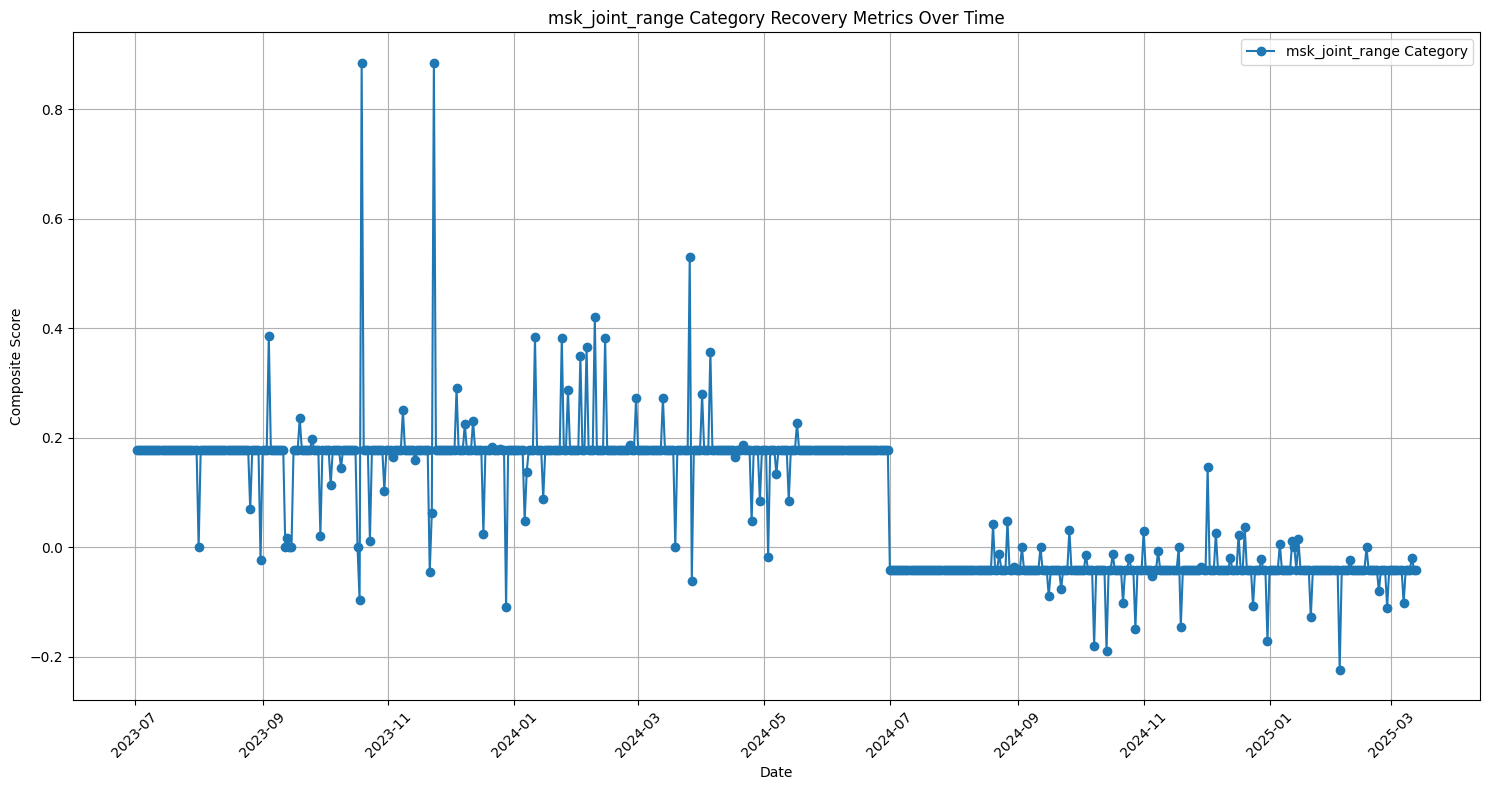


Summary Statistics for msk_joint_range Category:
count    621.000000
mean       0.088028
std        0.125197
min       -0.223636
25%       -0.040778
50%        0.178368
75%        0.178368
max        0.885000
Name: msk_joint_range, dtype: float64


In [45]:
# Filter for composite metrics only for the 'msk_joint_range' category
composite_df = df_recovery[df_recovery['metric'].str.contains('composite') & (df_recovery['category'] == 'msk_joint_range')]

# Pivot the data for better visualization
pivot_df = composite_df.pivot_table(index='sessionDate', columns='category', values='value')

# Filter for the 'msk_joint_range' category only
bio_df = pivot_df['msk_joint_range']

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(bio_df.index, bio_df, label='msk_joint_range Category', marker='o')

plt.title('msk_joint_range Category Recovery Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Composite Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics for msk_joint_range Category:")
print(bio_df.describe())


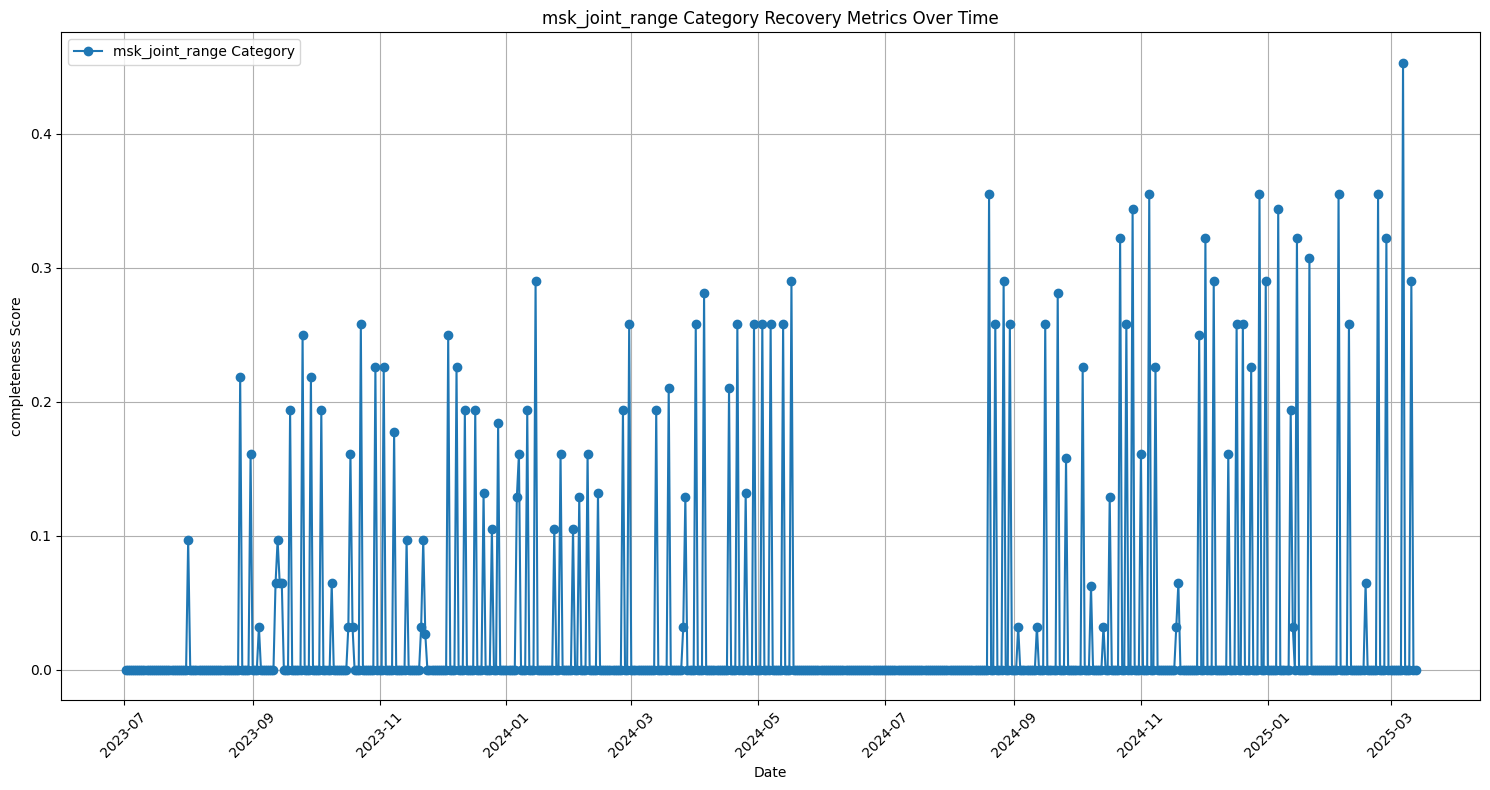


Summary Statistics for msk_joint_range Category:
count    621.000000
mean       0.031016
std        0.081584
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.453125
Name: msk_joint_range, dtype: float64


In [46]:
# Filter for completeness metrics only for the 'msk_joint_range' category
completeness_df = df_recovery[df_recovery['metric'].str.contains('completeness') & (df_recovery['category'] == 'msk_joint_range')]

# Pivot the data for better visualization
pivot_df = completeness_df.pivot_table(index='sessionDate', columns='category', values='value')

# Filter for the 'msk_joint_range' category only
bio_df = pivot_df['msk_joint_range']

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(bio_df.index, bio_df, label='msk_joint_range Category', marker='o')

plt.title('msk_joint_range Category Recovery Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('completeness Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics for msk_joint_range Category:")
print(bio_df.describe())


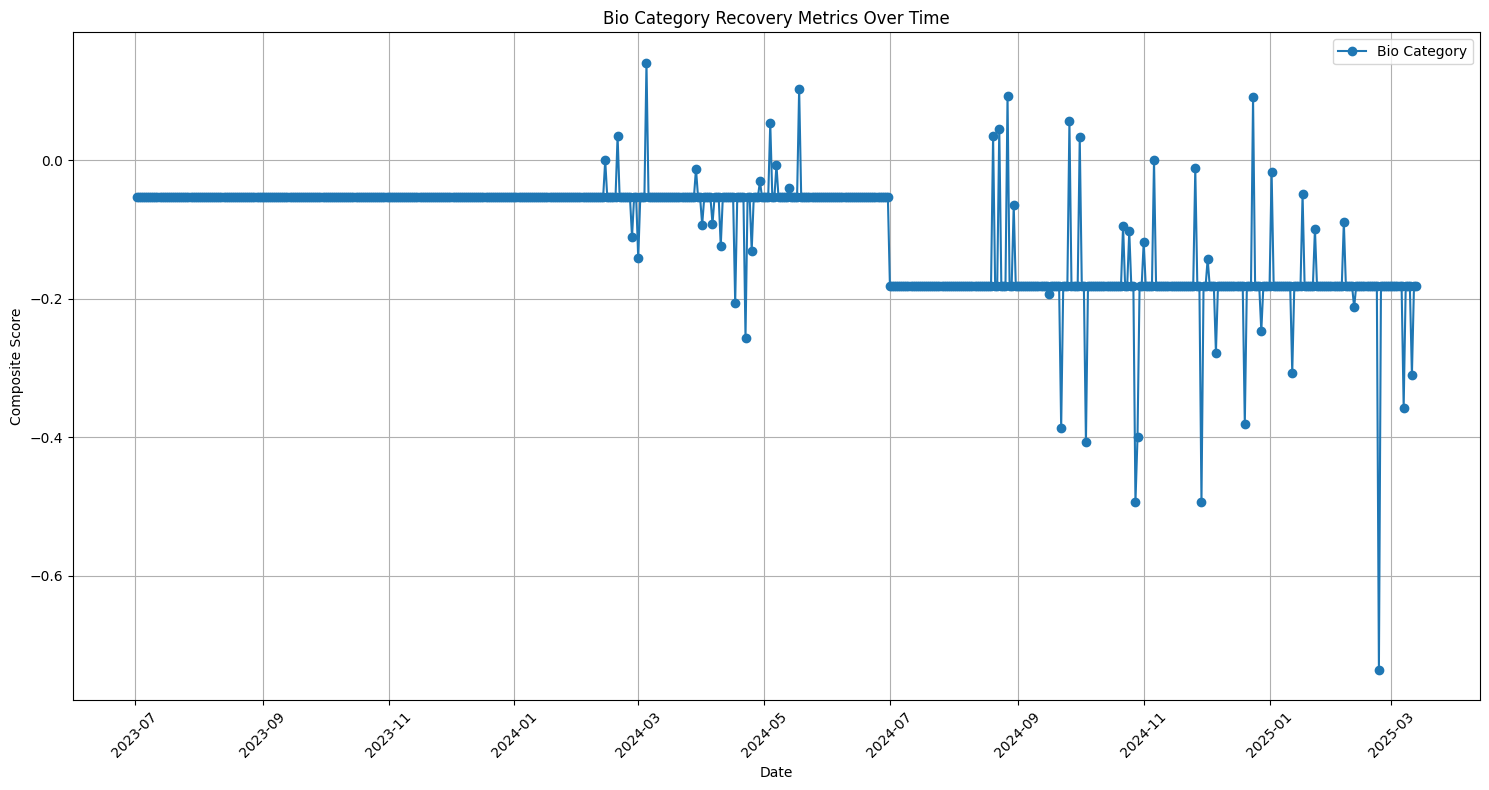


Summary Statistics for Bio Category:
count    621.000000
mean      -0.106589
std        0.079491
min       -0.735833
25%       -0.181936
50%       -0.053743
75%       -0.053743
max        0.140714
Name: bio, dtype: float64


In [47]:
# Filter for composite metrics only (excluding completeness metrics) for the 'bio' category
composite_df = df_recovery[df_recovery['metric'].str.contains('composite') & (df_recovery['category'] == 'bio')]

# Pivot the data for better visualization
pivot_df = composite_df.pivot_table(index='sessionDate', columns='category', values='value')

# Filter for the 'bio' category only
bio_df = pivot_df['bio']  # Assuming 'bio' is one of the categories in the columns

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(bio_df.index, bio_df, label='Bio Category', marker='o')

plt.title('Bio Category Recovery Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Composite Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics for Bio Category:")
print(bio_df.describe())

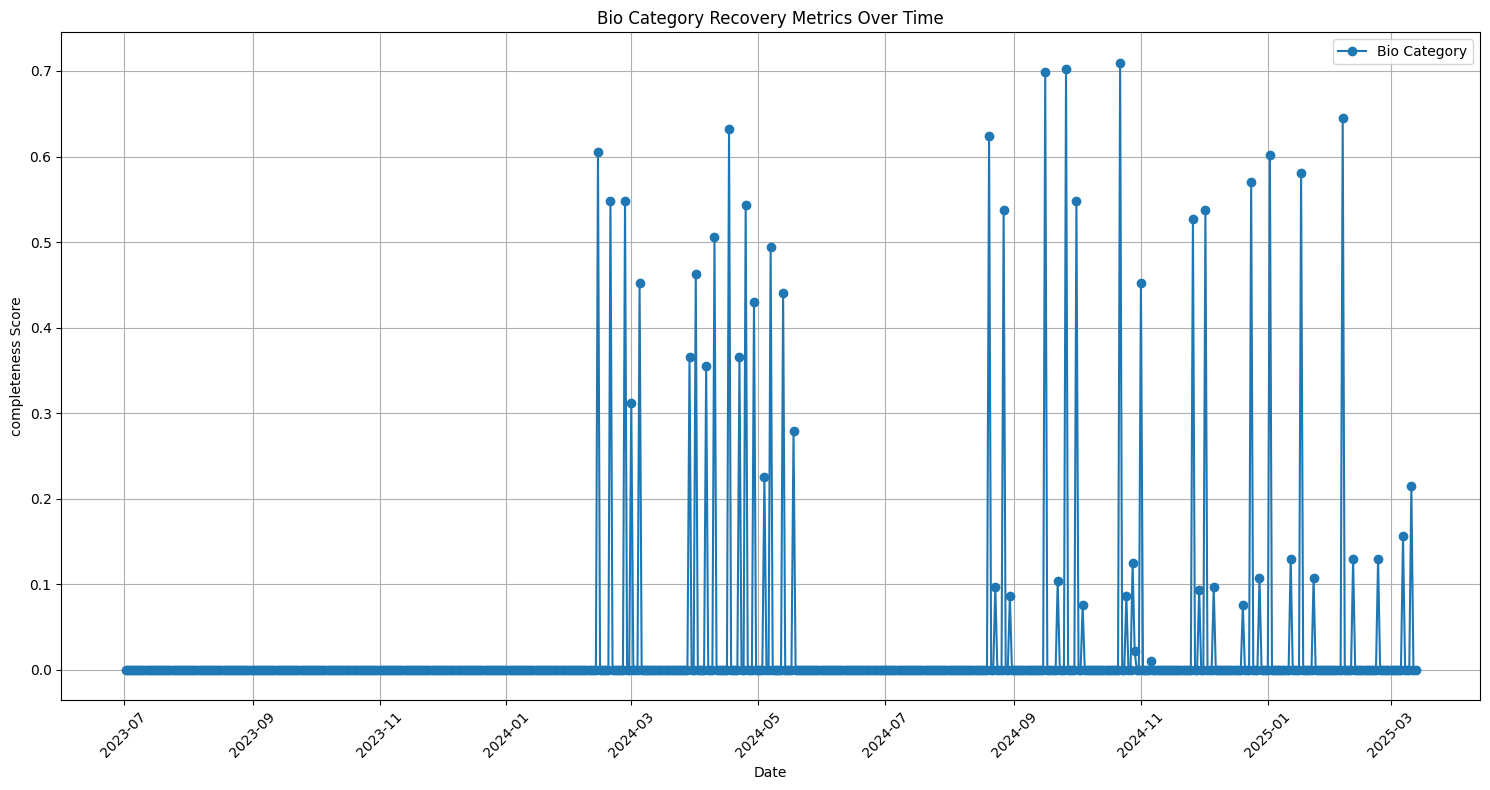


Summary Statistics for Bio Category for completeness metric:
count    621.000000
mean       0.027608
std        0.113628
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.709677
Name: bio, dtype: float64


In [48]:
# Filter for completeness metrics only for the 'bio' category
completeness_df = df_recovery[df_recovery['metric'].str.contains('completeness') & (df_recovery['category'] == 'bio')]

# Pivot the data for better visualization
pivot_df = completeness_df.pivot_table(index='sessionDate', columns='category', values='value')

# Filter for the 'bio' category only
bio_df = pivot_df['bio']

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(bio_df.index, bio_df, label='Bio Category', marker='o')

plt.title('Bio Category Recovery Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('completeness Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics for Bio Category for completeness metric:")
print(bio_df.describe())

Based on the plots for the variations of two categories (bio and msk_joint_range) across two metrics (completeness and composite), no clear trends in the data variations were observed. Therefore, I will generate random values for the value column in the mock data. These values will be drawn from a range defined in the competition data guide PDF.

### to simulate recovery data for player2 

In [49]:
# Create base structure for Player 2 by copying static columns from Player 1 (all columns except value column
# which will change randomly)
# Note: This assumes the same testing schedule was maintained for both players,
# which may not reflect reality. For more realistic data, I should:
# 1. Adjust dates based on Player 2's actual availability
# 2. Modify collection frequency according to Player 2's testing protocol
# 3. Account for Player 2-specific events (injuries, matches, etc.)
# Due to time constraints, this mock data will not fully reflect Player 2's actual
# schedule, injuries, or recovery patterns.
mock_df_recovery = df_recovery[['sessionDate','seasonName','metric','category']].copy()

In [50]:
mock_df_recovery

,sessionDate,seasonName,metric,category
0,2023-07-02,2023/2024,bio_baseline_completeness,bio
1,2023-07-02,2023/2024,bio_baseline_composite,bio
2,2023-07-02,2023/2024,emboss_baseline_score,total
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range
...,...,...,...,...
8068,2025-03-13,2024/2025,sleep_baseline_composite,sleep
8069,2025-03-13,2024/2025,soreness_baseline_completeness,soreness
8070,2025-03-13,2024/2025,soreness_baseline_composite,soreness
8071,2025-03-13,2024/2025,subjective_baseline_completeness,subjective


In [51]:
# Updated function to accept a single row
def generate_mock_value(row):
    metric = row['metric']
    category = row['category']

    # COMPLETENESS: Always between 0 and 1
    if 'completeness' in metric:
        val = np.random.normal(0.9, 0.1)
        return round(np.clip(val, 0, 1), 3)

    # COMPOSITE: Category-specific distributions (clip to [-1, 1])
    elif 'composite' in metric and 'emboss' not in metric:
        if category == 'soreness':
            val = np.random.normal(-0.3, 0.2)
        elif category == 'sleep':
            val = np.random.normal(0.2, 0.2)
        elif category == 'subjective':
            val = np.random.normal(0, 0.4)
        elif category == 'bio':
            val = np.random.normal(-0.1, 0.25)
        elif category == 'msk_joint_range':
            val = np.random.normal(0.1, 0.2)
        elif category == 'msk_load_tolerance':
            val = np.random.normal(-0.1, 0.3)
        else:
            val = np.random.normal(0, 0.3)
        return round(np.clip(val, -1, 1), 3)

    # EMBOSS: Placeholder — will be overwritten later
    elif metric == 'emboss_baseline_score':
        return np.nan

    # Fallback
    return np.nan

In [52]:
# Apply value generation function
mock_df_recovery['value'] = mock_df_recovery.apply(generate_mock_value, axis=1)
mock_df_recovery

,sessionDate,seasonName,metric,category,value
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.884
1,2023-07-02,2023/2024,bio_baseline_composite,bio,-0.238
2,2023-07-02,2023/2024,emboss_baseline_score,total,NaN
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,1.000
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,-0.053
...,...,...,...,...,...
8068,2025-03-13,2024/2025,sleep_baseline_composite,sleep,0.099
8069,2025-03-13,2024/2025,soreness_baseline_completeness,soreness,0.830
8070,2025-03-13,2024/2025,soreness_baseline_composite,soreness,0.001
8071,2025-03-13,2024/2025,subjective_baseline_completeness,subjective,0.752


In [53]:
# Compute the 'emboss_baseline_score' as the average of all *_baseline_composite per sessionDate
def compute_emboss_score(group):
    composite_values = group.loc[
        group['metric'].str.endswith('composite') &
        (group['metric'] != 'emboss_baseline_score'),
        'value'
    ]
    if composite_values.dropna().empty:
        return np.nan
    return composite_values.mean()

In [54]:
# Update the emboss score for each sessionDate
emboss_mask = mock_df_recovery['metric'] == 'emboss_baseline_score'

In [55]:
# For each sessionDate, compute the aggregated emboss score
for date, group in mock_df_recovery.groupby('sessionDate'):
    score = compute_emboss_score(group)
    mock_df_recovery.loc[
        (mock_df_recovery['sessionDate'] == date) & emboss_mask,
        'value'
    ] = round(score, 3) if not np.isnan(score) else np.nan

In [56]:
mock_df_recovery['player_id'] = 2

mock_df_recovery

,sessionDate,seasonName,metric,category,value,player_id
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.884,2
1,2023-07-02,2023/2024,bio_baseline_composite,bio,-0.238,2
2,2023-07-02,2023/2024,emboss_baseline_score,total,0.099,2
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,1.000,2
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,-0.053,2
...,...,...,...,...,...,...
8068,2025-03-13,2024/2025,sleep_baseline_composite,sleep,0.099,2
8069,2025-03-13,2024/2025,soreness_baseline_completeness,soreness,0.830,2
8070,2025-03-13,2024/2025,soreness_baseline_composite,soreness,0.001,2
8071,2025-03-13,2024/2025,subjective_baseline_completeness,subjective,0.752,2


In [57]:
combined_recovery_df = pd.concat([df_recovery, mock_df_recovery], ignore_index=True)

combined_recovery_df.to_csv("mock_recovery_status_data.csv", index=False)

In [58]:
combined_recovery_df

,sessionDate,seasonName,metric,category,value,player_id
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.000000,1
1,2023-07-02,2023/2024,bio_baseline_composite,bio,-0.053743,1
2,2023-07-02,2023/2024,emboss_baseline_score,total,0.001528,1
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.000000,1
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,0.178368,1
...,...,...,...,...,...,...
16141,2025-03-13,2024/2025,sleep_baseline_composite,sleep,0.099000,2
16142,2025-03-13,2024/2025,soreness_baseline_completeness,soreness,0.830000,2
16143,2025-03-13,2024/2025,soreness_baseline_composite,soreness,0.001000,2
16144,2025-03-13,2024/2025,subjective_baseline_completeness,subjective,0.752000,2


### Process individual priority areas

In [59]:
# Load the CSV
df_priority = pd.read_csv("CFC Individual Priority Areas.csv")

# Convert dates to datetime
df_priority['Target set'] = pd.to_datetime(df_priority['Target set'], format="%d/%m/%Y")
df_priority['Review Date'] = pd.to_datetime(df_priority['Review Date'], format="%d/%m/%Y")

# Convert Priority to int
df_priority['Priority'] = df_priority['Priority'].astype(int)

df_priority

,Priority,Category,Area,Target,Performance Type,Target set,Review Date,Tracking
0,1,Recovery,Sleep,Increase average sleep by 1hr per night,Habit,2025-03-07,2025-05-07,On Track
1,2,Recovery,Nutrition,45g of carbohydrate every half time,Habit,2025-03-07,2025-05-07,On Track
2,3,Performance,Sprint,>65% in max velocity score,Outcome,2025-03-07,2025-05-07,Achieved
